## Bipartite networks from Chowdhary and Assisi, 2019

#### To-do list
3. Bipartite networks
	1. No within-group connections
	2. Complementary edges are excitatory connections
	3. Ratio of cumulative strength of excitation/inhibition is varied

#### Imports/Init

In [529]:
from brian2 import *

In [530]:
%matplotlib inline

In [531]:
# Constants
tau = 4*ms
I = 1.1/ms
gamma = 1/ms

# Non-dimensionalized constants
tp = tau/ms
curr = I*ms
g = gamma*ms
out = curr/g  #should be > the threshold of firing

# equation (1)
eqs = '''
dv/dt = I - gamma*v : 1
'''

# equation (2) 
eqs2 = '''
dv/dt = ((I/gamma) - v)/tau : 1
'''

In [532]:
# From starter.ipynb
# Init all 100 neurons with random starting V, the groups G1 and G2 are connected with probability of 0.6 as in the paper
# (only inhibitory connections across the groups, no other connections)

start_scope()

exc = 0.001
n = 100

np.random.seed(10)

G1 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='euler')
G2 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='euler')

group1init = np.random.randint(1, 10, size=n)/10
group2init = np.random.randint(1, 10, size=n)/10

G1.v = group1init
G2.v = group2init

# G1.v = 'rand()'
# G2.v = 0.

In [533]:
S1 = Synapses(G1, G2, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post - exc)/curr)))/tp))')
S2 = Synapses(G2, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post - exc)/curr)))/tp))')

# S1 = Synapses(G1, G2, on_pre='v_post = v_post - exc')
# S2 = Synapses(G2, G1, on_pre='v_post = v_post - exc')

p = 0.6

S1.connect(p = p)
S2.connect(p = p)

M1 = StateMonitor(G1, 'v', record=True)
M2 = StateMonitor(G2, 'v', record=True)
Sp1 = SpikeMonitor(G1)
Sp2 = SpikeMonitor(G2)

run(300*ms)

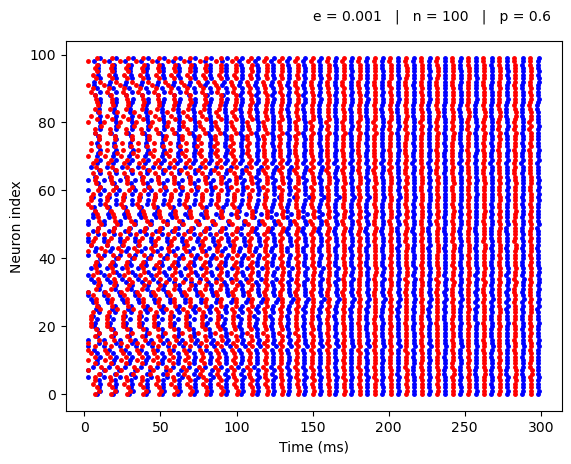

In [534]:
plot(Sp1.t/ms, Sp1.i, '.b', markersize=5)
plot(Sp2.t/ms, Sp2.i, '.r', markersize=5)
xlabel('Time (ms)')
ylabel('Neuron index')
text(150, 110, 'e = {}   |   n = {}   |   p = {}'.format(exc, n, p))
show()

# !neurons of the same indices across the two groups are not necessarily connected to each other!

In [535]:
# should plot phase space at the start vs towards the end
# starts distributed across phase space
# becomes clustered

In [539]:
# ISI Plotter (needs to be modded for this version with multiple neurons)
# spikes = min(len(Sp2.t[:]), len(Sp1.t[:]))
# Vals = Sp1.t[:spikes] - Sp2.t[:spikes]

# plot(Sp1.t/ms, Vals/ms)
# plt.axhline(y = 0, color = 'r', linestyle = '--')
# plt.axhline(y = 11/2, color = 'g', linestyle = '--')
# xlabel('Time')
# ylabel('Interspike Intervals')
# ylim(-50, 500);

#### To-do list (again)

- Bipartite network
	- Is there synchrony between neurons of the same group, even without excitatory connections?
	> Our simulations showed that while connected neurons did
	> not fire together, nodes from the same partition did not
	> fire synchronously either.
- Sudoku network
- Vogels' model
	- What kind of connections between inhibitory and excitatory groups (E-I, I-I, I-E)